In [1]:
import random
random.seed(0)

import numpy as np
np.random.seed(0)

import tensorflow as tf
tf.random.set_seed(0)

2024-03-26 11:42:20.180318: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-26 11:42:20.180432: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-26 11:42:20.321908: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


# Importing dependencies

In [20]:
from PIL import Image
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tensorflow.keras.preprocessing.image import ImageDataGenerator #pipeline for image
from tensorflow.keras import layers,models

# Data Preprocessing


In [3]:
base_dir = '/kaggle/input/plantvillage-dataset/color'

(256, 256, 3)


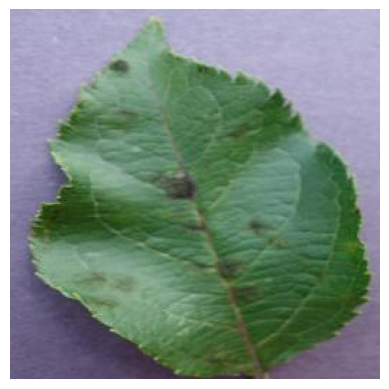

In [4]:
image_path = '/kaggle/input/plantvillage-dataset/color/Apple___Apple_scab/00075aa8-d81a-4184-8541-b692b78d398a___FREC_Scab 3335.JPG'
img = mpimg.imread(image_path)
print(img.shape)
plt.imshow(img)
plt.axis('off')
plt.show()

In [5]:
# required image parameter
img_size = 224
batch_size = 32

In [6]:
# image data generation

data_gen = ImageDataGenerator(
    rescale= 1./255,   # rescalling images 
    validation_split = 0.3
    
)

In [7]:
# Train generator 

train_generator = data_gen.flow_from_directory(
    base_dir,
    target_size=(img_size,img_size),
    batch_size = batch_size,
    subset='training',
    class_mode = 'categorical'

)

Found 38029 images belonging to 38 classes.


In [8]:
# validation generator 
validation_generator = data_gen.flow_from_directory(
    base_dir,
    target_size=(img_size,img_size),
    batch_size = batch_size,
    subset='validation',
    class_mode = 'categorical'
    
)


Found 16276 images belonging to 38 classes.


# CNN

In [9]:
model = models.Sequential()

model.add(layers.Conv2D(32,(3,3),activation='relu',input_shape=(img_size,img_size,3)))
model.add(layers.MaxPooling2D(2,2))

model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.MaxPooling2D(2,2))

model.add(layers.Flatten())
model.add(layers.Dense(256,activation='relu'))
model.add(layers.Dense(train_generator.num_classes,activation='softmax'))


/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [10]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 186624)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │    47,776,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 38)             │         9,766 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 47,805,158 (182.36 MB)

 Trainable params: 47,805,158 (182.36 MB)

 Non-trainable params: 0 (0.00 B)

In [11]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

# Model training

In [12]:
history = model.fit(
    train_generator,
    steps_per_epoch = train_generator.samples // batch_size,
    epochs = 5,
    validation_data = validation_generator,
    validation_steps = validation_generator.samples // batch_size
)

Epoch 1/5


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
2024-03-26 11:43:11.804136: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 49284: 7.84353, expected 6.92193
2024-03-26 11:43:11.804201: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 49286: 7.76792, expected 6.84632
2024-03-26 11:43:11.804215: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 49287: 6.15631, expected 5.23472
2024-03-26 11:43:11.804228: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 49288: 6.71859, expected 5.797
2024-03-26 11:43:11.804246: E external/local_xla/xla/service/gpu/buffer_co

   1/1188 ━━━━━━━━━━━━━━━━━━━━ 2:58:10 9s/step - accuracy: 0.0625 - loss: 3.6241

I0000 00:00:1711453396.632924     100 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


 130/1188 ━━━━━━━━━━━━━━━━━━━━ 3:10 180ms/step - accuracy: 0.1398 - loss: 7.6919

2024-03-26 11:43:40.473188: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 6: 6.85897, expected 6.06893
2024-03-26 11:43:40.473246: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 7: 5.96167, expected 5.17163
2024-03-26 11:43:40.473256: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 9: 6.44264, expected 5.65259
2024-03-26 11:43:40.473263: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 10: 6.23199, expected 5.44195
2024-03-26 11:43:40.473271: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 11: 5.01164, expected 4.22159
2024-03-26 11:43:40.473278: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 12: 5.90012, expected 5.11007
2024-03-26 11:43:40.473285: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 13: 6.65641, expected 5.86637
2024-03-26 11:43:40.473293: E external/local_xla/xl

1188/1188 ━━━━━━━━━━━━━━━━━━━━ 320s 262ms/step - accuracy: 0.3633 - loss: 3.1471 - val_accuracy: 0.6890 - val_loss: 1.0094
Epoch 2/5
   1/1188 ━━━━━━━━━━━━━━━━━━━━ 32s 28ms/step - accuracy: 0.7188 - loss: 1.0423

/opt/conda/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)
2024-03-26 11:48:27.757693: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 6: 6.63812, expected 5.86815
2024-03-26 11:48:27.757763: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 7: 6.57545, expected 5.80549
2024-03-26 11:48:27.757772: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 8: 6.58905, expected 5.81908
2024-03-26 11:48:27.757780: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 9: 6.3889, expected 5.61894
2024-03-26 11:48:27.757787: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 10: 6.23839, expected 5.46843
2024

1188/1188 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7188 - loss: 1.0423 - val_accuracy: 0.6500 - val_loss: 0.8491
Epoch 3/5
1188/1188 ━━━━━━━━━━━━━━━━━━━━ 105s 88ms/step - accuracy: 0.6658 - loss: 1.1078 - val_accuracy: 0.6731 - val_loss: 1.0615
Epoch 4/5
1188/1188 ━━━━━━━━━━━━━━━━━━━━ 0s 25us/step - accuracy: 0.6562 - loss: 0.8848 - val_accuracy: 0.5500 - val_loss: 1.0864
Epoch 5/5
1188/1188 ━━━━━━━━━━━━━━━━━━━━ 102s 86ms/step - accuracy: 0.7239 - loss: 0.9142 - val_accuracy: 0.6898 - val_loss: 1.1306


# Model Evalution

In [15]:
val_loss,val_accuracy = model.evaluate(validation_generator,steps=validation_generator.samples // batch_size)
print(f"Validation Accuracy: {val_accuracy * 100:.2f}%")

508/508 ━━━━━━━━━━━━━━━━━━━━ 30s 59ms/step - accuracy: 0.6898 - loss: 1.1572
Validation Accuracy: 68.98%


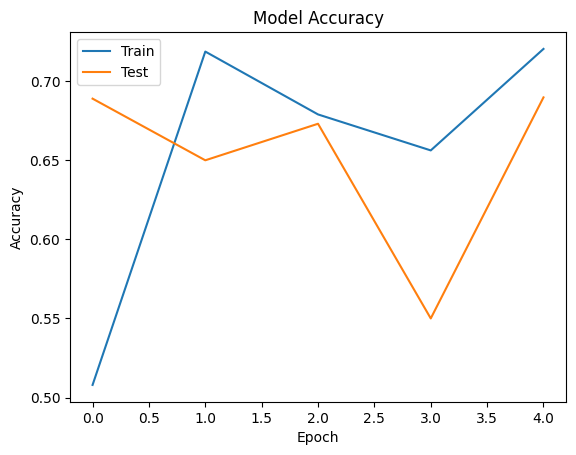

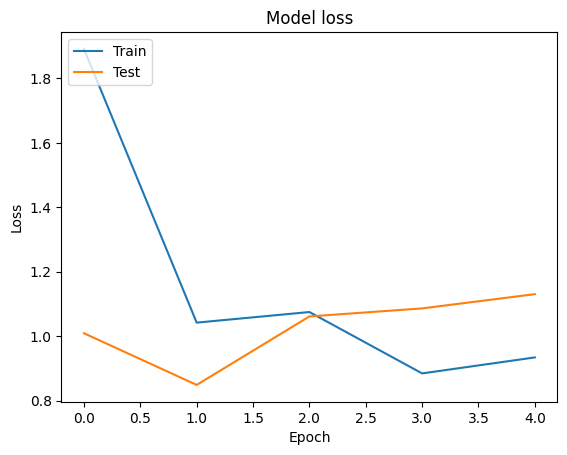

In [16]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train','Test'],loc='upper left')
plt.show()


plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train','Test'],loc='upper left')
plt.show()


# Building Predictive System

In [17]:
# Function to Load and Preprocess the Image using Pillow
def load_and_preprocess_image(image_path, target_size=(224, 224)):
    # Load the image
    img = Image.open(image_path)
    # Resize the image
    img = img.resize(target_size)
    # Convert the image to a numpy array
    img_array = np.array(img)
    # Add batch dimension
    img_array = np.expand_dims(img_array, axis=0)
    # Scale the image values to [0, 1]
    img_array = img_array.astype('float32') / 255.
    return img_array

# Function to Predict the Class of an Image
def predict_image_class(model, image_path, class_indices):
    preprocessed_img = load_and_preprocess_image(image_path)
    predictions = model.predict(preprocessed_img)
    predicted_class_index = np.argmax(predictions, axis=1)[0]
    predicted_class_name = class_indices[predicted_class_index]
    return predicted_class_name

In [18]:
class_indices = {v: k for k, v in train_generator.class_indices.items()}


In [21]:
json.dump(class_indices, open('class_indices.json', 'w'))


In [22]:
image_path = '//kaggle/input/plantvillage-dataset/color/Apple___Apple_scab/0208f4eb-45a4-4399-904e-989ac2c6257c___FREC_Scab 3037.JPG'
#image_path = '/content/test_blueberry_healthy.jpg'
#image_path = '/content/test_potato_early_blight.jpg'
predicted_class_name = predict_image_class(model, image_path, class_indices)

# Output the result
print("Predicted Class Name:", predicted_class_name)

2024-03-26 11:54:44.868173: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 147863: 4.14435, expected 3.59734
2024-03-26 11:54:44.868227: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 148032: 3.73171, expected 3.1847
2024-03-26 11:54:44.868242: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 148049: 4.2981, expected 3.75109
2024-03-26 11:54:44.868257: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 149297: 4.2275, expected 3.68049
2024-03-26 11:54:44.868266: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 149362: 3.89754, expected 3.35053
2024-03-26 11:54:44.868274: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 149444: 4.35104, expected 3.80403
2024-03-26 11:54:44.868282: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 149482: 4.25819, expected 3.71118
2024-03-26 11:54:44.868

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 568ms/step
Predicted Class Name: Squash___Powdery_mildew


In [ ]:
model.save('drive/MyDrive/Youtube/trained_models/plant_disease_prediction_model.h5')


In [23]:
model.save('plant_disease_prediction_model.h5')
